This notebook does two things: merges the tropes and the letterboxd data, and then creates a dataframe with tropes as the columns

# Import libs and setup github root

In [35]:
import pandas as pd
import ast
import numpy as np
from matplotlib import pyplot as plt

In [36]:
import os

def find_repo_root(start_path):
    """
    useful general function for finding the (first, closest) repo root so github file paths work the same on different machines 
    """
    current_path = os.path.abspath(start_path)
    
    while True:
        # Check for the existence of the .git directory or other indicators
        if os.path.isdir(os.path.join(current_path, '.git')) or \
           os.path.isfile(os.path.join(current_path, 'README.md')):
            return current_path
        
        parent_path = os.path.dirname(current_path)
        
        # Stop if we reach the root directory
        if parent_path == current_path:
            break
        
        current_path = parent_path

    return None  # Return None if not found

root = find_repo_root(os.getcwd())
print(root)

c:\Users\fitsl\Documents\Programming\UVM Programming Classes\PoCS\pocs_project


# Load, clean, and merge the trope and review data

In [37]:
df = pd.read_csv(f"{root}/Data/letterboxd_search.csv", index_col=0)
df.columns
df['Tropes'].iloc[0]

' ArgentineMedia,BlackMagic,ChekhovsGun,ChekhovsGunman,DramaticThunder,DueToTheDead,EvilMentor,ExactWords,FilmsOf20102014,GrayRainOfDepression,GreatOffscreenWar,HesBack,HistoricalHeroUpgrade,HowWeGotHere,ItAlwaysRainsAtFunerals,OffscreenMomentOfAwesome,RightfulKingReturns,SexyDiscretionShot,TheExile,ThouShaltNotKill,VeryLooselyBasedOnATrueStory,WeWantOurJerkBack,WhatsUpKingDude'

In [38]:
df[df['Movie'].str.contains('Element')]

,Movie,Tropes,Movie_strip,year,imdb_,letterboxd_search
300,The Element Of Crime,"AfterTheEnd,AloneWithThePsycho,AntiHero,Avert...",The Element Of Crime,1984.0,87280,https://letterboxd.com/search/The+Element+Of+C...
6400,De Kalb Elementary,"AbandonedArea,AteHisGun,BasedOnATrueStory,Fil...",De Kalb Elementary,2017.0,5926890,https://letterboxd.com/search/De+Kalb+Elementa...
6832,The Fifth Element,"AGlassInTheHand,AVillainNamedZrg,AbsurdlyHuge...",The Fifth Element,1997.0,119116,https://letterboxd.com/search/The+Fifth+Elemen...
8243,Five Element Ninjas,"AllGirlsWantBadBoys,AvertedTrope,BittersweetE...",Five Element Ninjas,1982.0,84921,https://letterboxd.com/search/Five+Element+Nin...
8539,The Elementary School,"CzechFilms,TongueOnTheFlagpole",The Elementary School,1991.0,102571,https://letterboxd.com/search/The+Elementary+S...


In [39]:
df['Tropes'].loc[6832]

' AGlassInTheHand,AVillainNamedZrg,AbsurdlyHugePopulation,ActionGenre,ActionGirlFriend,ActionGirlfriend,ActionHero,ActivationSequence,ActorAllusion,AdvertisedExtra,AerithAndBob,AggressiveNegotiations,AirVentPassageway,AlienBlood,AlienWorks,AllianceWithAnAbomination,AlternateFire,AlwaysAccurateAttack,AncientOrderOfProtectors,AndStarring,AnimalEspionage,ArcNumber,ArcWords,ArchiveBinge,ArmorIsUseless,ArmourIsUseless,ArtMajorPhysics,ArtificialHuman,ArtificialPerson,ArtisticLicenceBiology,ArtisticLicenceEconomics,ArtisticLicenceGunSafety,ArtisticLicenseBiology,ArtisticLicenseEconomics,ArtisticLicenseGunSafety,ArtisticLicenseHistory,ArtisticLicensePhysics,AsideGlance,AskAStupidQuestion,AssholeVictim,AtTheOperaTonight,AtomPunk,Atompunk,AttackBackfire,AudienceSurrogate,AutoDoc,Autodoc,AxCrazy,BAreYourMidriff,BFG,BRINGIT,BadBoss,BadCopIncompetentCop,BadLiar,BadassAdorable,BadassBack,BadassNormal,BaldBlackLeaderGuy,BallisticDiscount,BandageBabe,BandageWince,BareYourMidriff,BareyourMidriff,Barrie

In [40]:
df['nu_tropes'] = df['Tropes'].apply(lambda x: x.split(","))
# for trope in df[df['Movie'] == "Borat"]['nu_tropes']:
#     print(trope)

In [41]:
df.drop(columns=['Tropes', 'year', 'Movie_strip'], inplace=True)
df.rename(columns= {
    'Movie' : 'Title'
}, inplace=True)
df_old = df.copy()

In [42]:
df_comments = pd.read_parquet(f"{root}/Data/Whole_sets/cleaned_n=8_comments.parquet")
df_comments['Year'] = df_comments['Movie'].apply(lambda x: x.get('year'))
df_comments['url'] = df_comments['Movie'].apply(lambda x: x.get('url'))
df_comments.drop(columns=['reviews_extracted_lower', 'reviews_mash', 'Movie'], inplace=True)


In [43]:
df_comments.iloc[0]

letterboxd_search    https://letterboxd.com/search/Puerta+De+Hierro...
comments             [{'stars': '★★★★', 'review': 'Yo no entendí bi...
reviews_extracted    [Yo no entendí bien la película, Perón sabía q...
review_stars         [8.0, 9.0, 4.0, 10.0, 6.0, 5.0, 1.0, 10.0, 8.0...
review_dates         [09 Nov 2020, 17 Jul 2020, 08 Mar 2021, 21 Aug...
genres                                                              []
avg_rating                                               3.30 out of 5
directors                        [Víctor Laplace, Dieguillo Fernández]
Year                                                              2013
url                  https://letterboxd.com/film/puerta-de-hierro-e...
Name: 0, dtype: object

In [44]:
df_comments.head()

,letterboxd_search,comments,reviews_extracted,review_stars,review_dates,genres,avg_rating,directors,Year,url
0,https://letterboxd.com/search/Puerta+De+Hierro...,"[{'stars': '★★★★', 'review': 'Yo no entendí bi...","[Yo no entendí bien la película, Perón sabía q...","[8.0, 9.0, 4.0, 10.0, 6.0, 5.0, 1.0, 10.0, 8.0...","[09 Nov 2020, 17 Jul 2020, 08 Mar 2021, 21 Aug...",[],3.30 out of 5,"[Víctor Laplace, Dieguillo Fernández]",2013,https://letterboxd.com/film/puerta-de-hierro-e...
1,https://letterboxd.com/search/Better+Off+Dead....,"[{'stars': '★★★★½', 'review': ""this fucking gu...",[this fucking guy took a shower with socks on ...,"[9.0, 10.0, 8.0, 8.0, 10.0, 10.0, 9.0, 8.0, 7....","[18 Dec 2021, 06 Apr 2016, 29 Feb 2020, 25 Aug...","[Romance, Comedy]",3.54 out of 5,[Savage Steve Holland],1985,https://letterboxd.com/film/better-off-dead/
2,https://letterboxd.com/search/Team+America+Wor...,"[{'stars': '★★★★', 'review': 'Matt Damon knock...","[Matt Damon knocks it out of the park., it's b...","[8.0, 6.0, 8.0, 8.0, 7.0, 9.0, 7.0, 4.0, nan, ...","[, 16 Feb 2016, , 16 Oct 2019, 03 Sep 2016, 02...","[Action, Adventure, Comedy]",3.47 out of 5,[Trey Parker],2004,https://letterboxd.com/film/team-america-world...
3,https://letterboxd.com/search/The+Hills+Have+E...,"[{'stars': '½', 'review': ""I'm so tired of rap...",[I'm so tired of rape and sexual assault again...,"[1.0, 4.0, 7.0, 5.0, 8.0, 7.0, 3.0, 6.0, 9.0, ...","[24 Oct 2018, 20 Oct 2017, 18 Oct 2022, 02 Feb...","[Horror, Thriller]",3.01 out of 5,[Alexandre Aja],2006,https://letterboxd.com/film/the-hills-have-eye...
4,https://letterboxd.com/search/The+Face+Of+Fu+M...,"[{'stars': '★★★', 'review': 'It was the West G...",[It was the West German involvement in this pr...,"[6.0, 8.0, 5.0, 5.0, 6.0, 8.0, 1.0, 5.0, 6.0, ...","[28 Jan 2024, 08 Jan 2022, 20 Jan 2024, 28 Mar...","[Thriller, Crime]",2.94 out of 5,[Don Sharp],1965,https://letterboxd.com/film/the-face-of-fu-man...


In [52]:
df_merged = pd.merge(
    left=df_comments,
    right=df,
    on='letterboxd_search',
    how='left'
)
df_merged

,letterboxd_search,comments,reviews_extracted,review_stars,review_dates,genres,avg_rating,directors,Year,url,Title,imdb_,nu_tropes
0,https://letterboxd.com/search/Puerta+De+Hierro...,"[{'stars': '★★★★', 'review': 'Yo no entendí bi...","[Yo no entendí bien la película, Perón sabía q...","[8.0, 9.0, 4.0, 10.0, 6.0, 5.0, 1.0, 10.0, 8.0...","[09 Nov 2020, 17 Jul 2020, 08 Mar 2021, 21 Aug...",[],3.30 out of 5,"[Víctor Laplace, Dieguillo Fernández]",2013,https://letterboxd.com/film/puerta-de-hierro-e...,Puerta De Hierro,2512204.0,"[ ArgentineMedia, BlackMagic, ChekhovsGun, Che..."
1,https://letterboxd.com/search/Better+Off+Dead....,"[{'stars': '★★★★½', 'review': ""this fucking gu...",[this fucking guy took a shower with socks on ...,"[9.0, 10.0, 8.0, 8.0, 10.0, 10.0, 9.0, 8.0, 7....","[18 Dec 2021, 06 Apr 2016, 29 Feb 2020, 25 Aug...","[Romance, Comedy]",3.54 out of 5,[Savage Steve Holland],1985,https://letterboxd.com/film/better-off-dead/,Better Off Dead...,88794.0,"[ AbhorrentAdmirer, AcceptableTargets, ActorAl..."
2,https://letterboxd.com/search/Team+America+Wor...,"[{'stars': '★★★★', 'review': 'Matt Damon knock...","[Matt Damon knocks it out of the park., it's b...","[8.0, 6.0, 8.0, 8.0, 7.0, 9.0, 7.0, 4.0, nan, ...","[, 16 Feb 2016, , 16 Oct 2019, 03 Sep 2016, 02...","[Action, Adventure, Comedy]",3.47 out of 5,[Trey Parker],2004,https://letterboxd.com/film/team-america-world...,Team America World Police,372588.0,"[ ADegreeInUseless, AHeroToHisHometown, Abstra..."
3,https://letterboxd.com/search/The+Hills+Have+E...,"[{'stars': '½', 'review': ""I'm so tired of rap...",[I'm so tired of rape and sexual assault again...,"[1.0, 4.0, 7.0, 5.0, 8.0, 7.0, 3.0, 6.0, 9.0, ...","[24 Oct 2018, 20 Oct 2017, 18 Oct 2022, 02 Feb...","[Horror, Thriller]",3.01 out of 5,[Alexandre Aja],2006,https://letterboxd.com/film/the-hills-have-eye...,The Hills Have Eyes,454841.0,"[ AdaptationDistillation, AdaptationExpansion,..."
4,https://letterboxd.com/search/The+Hills+Have+E...,"[{'stars': '½', 'review': ""I'm so tired of rap...",[I'm so tired of rape and sexual assault again...,"[1.0, 4.0, 7.0, 5.0, 8.0, 7.0, 3.0, 6.0, 9.0, ...","[24 Oct 2018, 20 Oct 2017, 18 Oct 2022, 02 Feb...","[Horror, Thriller]",3.01 out of 5,[Alexandre Aja],2006,https://letterboxd.com/film/the-hills-have-eye...,The Hills Have Eyes2,454841.0,"[ AdaptationalNameChange, AmbiguousSyntax, Att..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12071,https://letterboxd.com/search/Wonder+Seven+1994/,"[{'stars': '★★★★', 'review': ""This film is so ...",[This film is so fucking good! It's like a Joh...,"[8.0, 6.0, 6.0, 4.0, 6.0, 4.0, 7.0, 7.0, 9.0, ...","[22 Feb 2024, 15 Mar 2023, 25 Mar 2023, 13 Jan...",[Action],None found,[Tony Ching Siu-Tung],1994,https://letterboxd.com/film/wonder-seven/,Wonder Seven,110923.0,"[ ActionGirl, ActionPrologue, BadassBiker, Bar..."
12072,https://letterboxd.com/search/Julia+2022/,"[{'stars': '★★', 'review': 'it’s not that i di...",[it’s not that i didn’t like it. i think it’s ...,"[4.0, 4.0]","[08 Nov 2022, 18 Oct 2022]",[Documentary],None found,[Hanna Trofimova],2022,https://letterboxd.com/film/when-will-the-wint...,Julia,10975574.0,"[ AwardBait, BasedOnAGreatBigLie, BasedOnAgrea..."
12073,https://letterboxd.com/search/Sudden+Death+1995/,"[{'stars': '★★★½', 'review': 'A movie called S...","[A movie called SUDDEN DEATH, set a hockey gam...","[7.0, 8.0, 10.0, 8.0, 9.0, 8.0, 8.0, 9.0, 5.0,...","[17 Jan 2015, 24 Mar 2021, 15 Aug 2013, 08 Jul...","[Action, Drama, Thriller]",3.04 out of 5,[Peter Hyams],1995,https://letterboxd.com/film/sudden-death/,Sudden Death,114576.0,"[ AcceptableBreaksFromReality, AccidentalAthle..."
12074,https://letterboxd.com/search/The+Cat+From+Out...,"[{'stars': '★★★★★', 'review': 'fun fact! this ...",[fun fact! this movie actually wasn’t eligible...,"[10.0, 4.0, 4.0, 5.0, 6.0, 7.0, 6.0, 10.0, 7.0...","[15 Sep 2018, 28 Mar 2020, 21 Jan 2019, 24 Mar...","[Family, Comedy, Science Fiction]",3.01 out of 5,[Norman Tokar],1978,https://

In [54]:
df_merged[df_merged['Title'] == 'Venom']
df_merged['avg_rating'] = df_merged['avg_rating'].str.extract(r'(\d+(\.\d+)?)')[0].astype(float) * 2
df_merged


,letterboxd_search,comments,reviews_extracted,review_stars,review_dates,genres,avg_rating,directors,Year,url,Title,imdb_,nu_tropes,double_first_number
0,https://letterboxd.com/search/Puerta+De+Hierro...,"[{'stars': '★★★★', 'review': 'Yo no entendí bi...","[Yo no entendí bien la película, Perón sabía q...","[8.0, 9.0, 4.0, 10.0, 6.0, 5.0, 1.0, 10.0, 8.0...","[09 Nov 2020, 17 Jul 2020, 08 Mar 2021, 21 Aug...",[],6.60,"[Víctor Laplace, Dieguillo Fernández]",2013,https://letterboxd.com/film/puerta-de-hierro-e...,Puerta De Hierro,2512204.0,"[ ArgentineMedia, BlackMagic, ChekhovsGun, Che...",6.60
1,https://letterboxd.com/search/Better+Off+Dead....,"[{'stars': '★★★★½', 'review': ""this fucking gu...",[this fucking guy took a shower with socks on ...,"[9.0, 10.0, 8.0, 8.0, 10.0, 10.0, 9.0, 8.0, 7....","[18 Dec 2021, 06 Apr 2016, 29 Feb 2020, 25 Aug...","[Romance, Comedy]",7.08,[Savage Steve Holland],1985,https://letterboxd.com/film/better-off-dead/,Better Off Dead...,88794.0,"[ AbhorrentAdmirer, AcceptableTargets, ActorAl...",7.08
2,https://letterboxd.com/search/Team+America+Wor...,"[{'stars': '★★★★', 'review': 'Matt Damon knock...","[Matt Damon knocks it out of the park., it's b...","[8.0, 6.0, 8.0, 8.0, 7.0, 9.0, 7.0, 4.0, nan, ...","[, 16 Feb 2016, , 16 Oct 2019, 03 Sep 2016, 02...","[Action, Adventure, Comedy]",6.94,[Trey Parker],2004,https://letterboxd.com/film/team-america-world...,Team America World Police,372588.0,"[ ADegreeInUseless, AHeroToHisHometown, Abstra...",6.94
3,https://letterboxd.com/search/The+Hills+Have+E...,"[{'stars': '½', 'review': ""I'm so tired of rap...",[I'm so tired of rape and sexual assault again...,"[1.0, 4.0, 7.0, 5.0, 8.0, 7.0, 3.0, 6.0, 9.0, ...","[24 Oct 2018, 20 Oct 2017, 18 Oct 2022, 02 Feb...","[Horror, Thriller]",6.02,[Alexandre Aja],2006,https://letterboxd.com/film/the-hills-have-eye...,The Hills Have Eyes,454841.0,"[ AdaptationDistillation, AdaptationExpansion,...",6.02
4,https://letterboxd.com/search/The+Hills+Have+E...,"[{'stars': '½', 'review': ""I'm so tired of rap...",[I'm so tired of rape and sexual assault again...,"[1.0, 4.0, 7.0, 5.0, 8.0, 7.0, 3.0, 6.0, 9.0, ...","[24 Oct 2018, 20 Oct 2017, 18 Oct 2022, 02 Feb...","[Horror, Thriller]",6.02,[Alexandre Aja],2006,https://letterboxd.com/film/the-hills-have-eye...,The Hills Have Eyes2,454841.0,"[ AdaptationalNameChange, AmbiguousSyntax, Att...",6.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12071,https://letterboxd.com/search/Wonder+Seven+1994/,"[{'stars': '★★★★', 'review': ""This film is so ...",[This film is so fucking good! It's like a Joh...,"[8.0, 6.0, 6.0, 4.0, 6.0, 4.0, 7.0, 7.0, 9.0, ...","[22 Feb 2024, 15 Mar 2023, 25 Mar 2023, 13 Jan...",[Action],NaN,[Tony Ching Siu-Tung],1994,https://letterboxd.com/film/wonder-seven/,Wonder Seven,110923.0,"[ ActionGirl, ActionPrologue, BadassBiker, Bar...",NaN
12072,https://letterboxd.com/search/Julia+2022/,"[{'stars': '★★', 'review': 'it’s not that i di...",[it’s not that i didn’t like it. i think it’s ...,"[4.0, 4.0]","[08 Nov 2022, 18 Oct 2022]",[Documentary],NaN,[Hanna Trofimova],2022,https://letterboxd.com/film/when-will-the-wint...,Julia,10975574.0,"[ AwardBait, BasedOnAGreatBigLie, BasedOnAgrea...",NaN
12073,https://letterboxd.com/search/Sudden+Death+1995/,"[{'stars': '★★★½', 'review': 'A movie called S...","[A movie called SUDDEN DEATH, set a hockey gam...","[7.0, 8.0, 10.0, 8.0, 9.0, 8.0, 8.0, 9.0, 5.0,...","[17 Jan 2015, 24 Mar 2021, 15 Aug 2013, 08 Jul...","[Action, Drama, Thriller]",6.08,[Peter Hyams],1995,https://letterboxd.com/film/sudden-death/,Sudden Death,114576.0,"[ AcceptableBreaksFromReality, AccidentalAthle...",6.08
12074,https://letterboxd.com/search/The+Cat+From+Out...,"[{'stars': '★★★★★', 'review': 'fun fact! this ...",[fun fact! this movie actually wasn’t eligible...,"[10.0, 4.0, 4.0, 5.0, 6.0, 7.0, 6.0, 10.0, 7.0...","[15 Sep 2018, 28 Mar 2020, 21 Jan 2019, 24 Mar...","[Family, Comedy, Science Fiction]",6.02,[Norman Tokar],1978,https://letterboxd.com/

In [55]:
df_merged.to_parquet(f"{root}/Data/Whole_sets/merged_tropes_comments.parquet")

# Pivot the dataframe to make it trope-centered 

## Setup and first trial

In [ ]:
tropes = df_merged['nu_tropes'].explode()
tropes = tropes.unique().tolist()
df_t = pd.DataFrame({'trope' : tropes})
df_t

,trope
0,ArgentineMedia
1,BlackMagic
2,ChekhovsGun
3,ChekhovsGunman
4,DramaticThunder
...,...
37238,MultiTaskedConversation
37239,NelsonMandela
37240,TheRunningMan
37241,BullyHunter


In [ ]:
is_float = df_merged['nu_tropes'].apply(lambda x: isinstance(x, float))

# Display rows where 'Rating' is a float
weird_cols = df_merged[is_float]
weird_cols['nu_tropes'].isna()

282    True
283    True
284    True
285    True
286    True
287    True
288    True
289    True
290    True
291    True
Name: nu_tropes, dtype: bool

In [ ]:
def trope_grabber(trope, df, return_cols=['letterboxd_search', 'comments', 'reviews_extracted', 'review_stars',
       'review_dates', 'genres', 'avg_rating', 'directors', 'Year', 'url',
       'Title', 'imdb_']):
    

    def is_trope_in(x, trope):
        if isinstance(x, np.ndarray):
            x = x.tolist()  # Convert numpy array to list
        return trope in x if isinstance(x, list) else False

    try:
        # Boolean mask for matching tropes
        mask = df['nu_tropes'].apply(lambda x: pd.isna(x) if pd.isna(trope) else is_trope_in(x, trope))
        # Boolean mask for matching tropes
        mask = mask.astype(bool)  # Convert to boolean type if needed

        movies = df[mask]

        return movies[return_cols].values.tolist()
    except Exception as e:
        print(trope, e)

trope_grabber('Not', df_merged )

[['https://letterboxd.com/search/Waynes+World+1992/',
  '[{\'stars\': \'★★★★\', \'review\': "Garth lowkey builds a robot in this movie and we don\'t talk about that enough", \'date\': \'18 Jul 2020\'}, {\'stars\': \'★★★★\', \'review\': "If the people who don\'t like this movie were an ice cream flavour, they\'d be pralines and dick.", \'date\': \'\'}, {\'stars\': \'★★★½\', \'review\': \'Wayne and \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 Bill andGarth \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 \\xa0 TedExcellent🤝\', \'date\': \'09 May 2019\'}, {\'stars\': \'★★★★★\', \'review\': "Why is it that if a man kills another man in battle, it\'s called heroic, yet if he kills a man in the heat of passion, it\'s called murder?", \'date\': \'20 Jan 2022\'}, {\'stars\'

In [ ]:
df_merged.columns

Index(['letterboxd_search', 'comments', 'reviews_extracted', 'review_stars',
       'review_dates', 'genres', 'avg_rating', 'directors', 'Year', 'url',
       'Title', 'imdb_', 'nu_tropes'],
      dtype='object')

In [ ]:
return_cols=['letterboxd_search', 'comments', 'reviews_extracted', 'review_stars',
       'review_dates', 'genres', 'avg_rating', 'directors', 'Year', 'url',
       'Title', 'imdb_',]

In [ ]:
df_t1 = df_t.iloc[-1000:-1].copy()
df_t1['matched_movies']= df_t1['trope'].apply(lambda trope: trope_grabber(trope, df_merged))

for i, col in enumerate(return_cols):
    df_t1[col] = df_t1['matched_movies'].apply(
        lambda x: x[i] if isinstance(x, list) and len(x) > i else None
    )
df_t1.shape

(999, 14)

In [ ]:
df_t.shape

(37243, 1)

## Tropify the whole thing

In [ ]:
dft_1 = df_t.copy()
dft_1['matched_movies']= dft_1['trope'].apply(lambda trope: trope_grabber(trope, df_merged))

print("movies matched")


nan setting an array element with a sequence.
movies matched


In [ ]:
dft_1.shape

(37243, 2)

In [ ]:
df_t2 = dft_1.copy()
for i, col in enumerate(return_cols):
    df_t2[col] = df_t2['matched_movies'].apply(lambda x: [lst[i] for lst in x] if x is not None else [])
df_t2.drop(columns=['matched_movies'], inplace=True)
df_t2.shape

(37243, 13)

In [ ]:
df_t2
df_t2['length'] =df_t2['Title'].apply(lambda x: len(x))
df_t2.head()


,trope,letterboxd_search,comments,reviews_extracted,review_stars,review_dates,genres,avg_rating,directors,Year,url,Title,imdb_,length
0,ArgentineMedia,[https://letterboxd.com/search/Puerta+De+Hierr...,"[[{'stars': '★★★★', 'review': 'Yo no entendí b...","[[Yo no entendí bien la película, Perón sabía ...","[[8.0, 9.0, 4.0, 10.0, 6.0, 5.0, 1.0, 10.0, 8....","[[09 Nov 2020, 17 Jul 2020, 08 Mar 2021, 21 Au...","[[], [Comedy], [History, Drama], [Thriller, Cr...","[3.30 out of 5, 2.34 out of 5, 3.95 out of 5, ...","[[Víctor Laplace, Dieguillo Fernández], [Marco...","[2013, 2020, 1985, 2000]",[https://letterboxd.com/film/puerta-de-hierro-...,"[Puerta De Hierro, Corazon Loco, The Offic...","[2512204.0, 11827806.0, 89276.0, 247586.0]",4
1,BlackMagic,[https://letterboxd.com/search/Puerta+De+Hierr...,"[[{'stars': '★★★★', 'review': 'Yo no entendí b...","[[Yo no entendí bien la película, Perón sabía ...","[[8.0, 9.0, 4.0, 10.0, 6.0, 5.0, 1.0, 10.0, 8....","[[09 Nov 2020, 17 Jul 2020, 08 Mar 2021, 21 Au...","[[], [Drama, Mystery, Horror, Thriller], [Come...","[3.30 out of 5, 3.09 out of 5, 3.52 out of 5, ...","[[Víctor Laplace, Dieguillo Fernández], [Iain ...","[2013, 2005, 1998, 1973, 1982, 2009, 1990, 200...",[https://letterboxd.com/film/puerta-de-hierro-...,"[Puerta De Hierro, The Skeleton Key, Pract...","[2512204.0, 397101.0, 120791.0, 68288.0, 84749...",28
2,ChekhovsGun,[https://letterboxd.com/search/Puerta+De+Hierr...,"[[{'stars': '★★★★', 'review': 'Yo no entendí b...","[[Yo no entendí bien la película, Perón sabía ...","[[8.0, 9.0, 4.0, 10.0, 6.0, 5.0, 1.0, 10.0, 8....","[[09 Nov 2020, 17 Jul 2020, 08 Mar 2021, 21 Au...","[[], [Action, Adventure, Comedy], [Horror, Thr...","[3.30 out of 5, 3.47 out of 5, 3.01 out of 5, ...","[[Víctor Laplace, Dieguillo Fernández], [Trey ...","[2013, 2004, 2006, 2006, 2013, 2001, 2006, 200...",[https://letterboxd.com/film/puerta-de-hierro-...,"[Puerta De Hierro, Team America World Pol...","[2512204.0, 372588.0, 454841.0, 454841.0, 1549...",1801
3,ChekhovsGunman,[https://letterboxd.com/search/Puerta+De+Hierr...,"[[{'stars': '★★★★', 'review': 'Yo no entendí b...","[[Yo no entendí bien la película, Perón sabía ...","[[8.0, 9.0, 4.0, 10.0, 6.0, 5.0, 1.0, 10.0, 8....","[[09 Nov 2020, 17 Jul 2020, 08 Mar 2021, 21 Au...","[[], [Drama], [Thriller, Drama, Action], [Scie...","[3.30 out of 5, 3.59 out of 5, 3.17 out of 5, ...","[[Víctor Laplace, Dieguillo Fernández], [Kōzab...","[2013, 1951, 2007, 2016, 2019, 2010, 2014, 201...",[https://letterboxd.com/film/puerta-de-hierro-...,"[Puerta De Hierro, Clothes Of Deception, S...","[2512204.0, 43681.0, 822854.0, 2543164.0, 4364...",509
4,DramaticThunder,[https://letterboxd.com/search/Puerta+De+Hierr...,"[[{'stars': '★★★★', 'review': 'Yo no entendí b...","[[Yo no entendí bien la película, Perón sabía ...","[[8.0, 9.0, 4.0, 10.0, 6.0, 5.0, 1.0, 10.0, 8....","[[09 Nov 2020, 17 Jul 2020, 08 Mar 2021, 21 Au...","[[], [Action, Horror, Thriller, Science Fictio...","[3.30 out of 5, 2.92 out of 5, 3.68 out of 5, ...","[[Víctor Laplace, Dieguillo Fernández], [Steph...","[2013, 1994, 1992, 1999, 1982, 1961, 2005, 201...",[https://letterboxd.com/film/puerta-de-hierro-...,"[Puerta De Hierro, Death Machine, Death Be...","[2512204.0, 109575.0, 104070.0, 139809.0, 8365...",105


It's too big to save the whole thing, sadly. But we can save smaller pieces. (in fact, probably everything except for the comments)

In [ ]:
df_t3 = df_t2[['trope', 'Title', 'letterboxd_search']].copy()
df_t3.to_csv(f"{root}/Data/Trope_storage/movies_by_trope_with_lettersearch_and_length.csv")

# Get the genre count for each trope

In [ ]:
genres = df_merged['genres'].explode().unique().tolist()
genres = genres[1:]
genres

['Romance',
 'Comedy',
 'Action',
 'Adventure',
 'Horror',
 'Thriller',
 'Crime',
 'Drama',
 'History',
 'Mystery',
 'War',
 'Science Fiction',
 'TV Movie',
 'Fantasy',
 'Music',
 'Family',
 'Documentary',
 'Western',
 'Animation']

In [ ]:
df_t2['genres'].iloc[0]
def genre_counter(genre, lst_of_lists):
    try:
        flattened_genres = np.concatenate(lst_of_lists)
        return np.sum(flattened_genres == genre)
    except:
        return 0

df_t2['genres'].iloc[:5].apply(lambda x: genre_counter('Drama', x))


0      2
1      4
2    625
3    198
4     33
Name: genres, dtype: int32

In [ ]:
df_genre = df_t2[['trope', 'genres', 'length']].copy()
for genre in genres:
    df_genre[genre] = df_genre['genres'].apply(lambda x : genre_counter(genre, x))


df_genre

,trope,genres,length,Romance,Comedy,Action,Adventure,Horror,Thriller,Crime,...,Mystery,War,Science Fiction,TV Movie,Fantasy,Music,Family,Documentary,Western,Animation
0,ArgentineMedia,"[[], [Comedy], [History, Drama], [Thriller, Cr...",4,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,BlackMagic,"[[], [Drama, Mystery, Horror, Thriller], [Come...",28,2,6,3,4,19,5,0,...,4,0,1,0,12,1,3,0,0,1
2,ChekhovsGun,"[[], [Action, Adventure, Comedy], [Horror, Thr...",1801,195,601,575,410,346,543,291,...,200,49,315,27,203,45,161,22,42,24
3,ChekhovsGunman,"[[], [Drama], [Thriller, Drama, Action], [Scie...",509,67,184,151,97,72,150,114,...,67,18,69,9,42,10,36,10,13,8
4,DramaticThunder,"[[], [Action, Horror, Thriller, Science Fictio...",105,11,36,21,20,32,20,10,...,15,2,17,1,27,3,13,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37238,MultiTaskedConversation,"[[History, Drama]]",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37239,NelsonMandela,"[[Science Fiction, Thriller]]",1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
37240,TheRunningMan,"[[Science Fiction, Thriller]]",1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
37241,BullyHunter,"[[Family, Mystery, Crime]]",1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


In [ ]:
df_genre.drop(columns='genres').to_csv(f"{root}/Data/liteweight/genre_counts_by_trope.csv")

In [ ]:
df_genre.columns

Index(['trope', 'genres', 'length', 'Romance', 'Comedy', 'Action', 'Adventure',
       'Horror', 'Thriller', 'Crime', 'Drama', 'History', 'Mystery', 'War',
       'Science Fiction', 'TV Movie', 'Fantasy', 'Music', 'Family',
       'Documentary', 'Western', 'Animation'],
      dtype='object')

<Axes: >

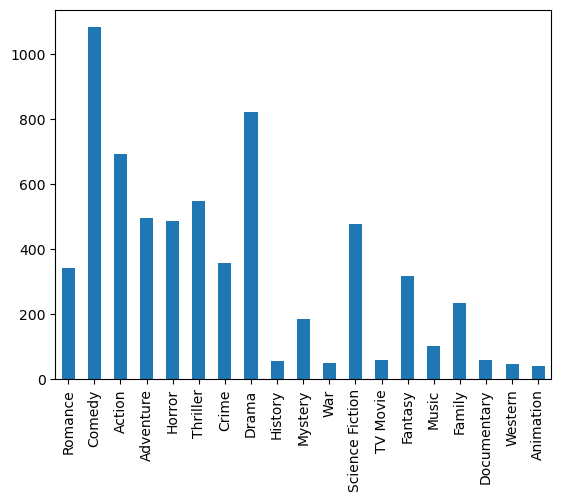

In [ ]:
import seaborn as sns
genre_cols = ['Romance', 'Comedy', 'Action', 'Adventure',
       'Horror', 'Thriller', 'Crime', 'Drama', 'History', 'Mystery', 'War',
       'Science Fiction', 'TV Movie', 'Fantasy', 'Music', 'Family',
       'Documentary', 'Western', 'Animation']
# sns.histplot(data=df_genre.sort_values(by='length', ascending=False).iloc[0], x='length')

data=df_genre.sort_values(by='length', ascending=False).iloc[0]
data[genre_cols].plot(kind='bar')
# Step 1: Sum the values across all rows for each genre
# genre_counts = data[genre_cols].sum(axis=0)
# genre_counts
# # Step 2: Plot the histogram
# plt.figure(figsize=(10, 6))
# plt.bar(genre_counts.index, genre_counts.values, color='skyblue')

# # Adding labels and title
# plt.xlabel('Genres')
# plt.ylabel('Frequency')
# plt.title('Genre Frequency Histogram')
# plt.xticks(rotation=45, ha='right')  # Rotate genre labels for better readability

# # Show the plot
# plt.tight_layout()
# plt.show()
